<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [13]:
import piplite
await piplite.install(['numpy', 'pandas', 'seaborn', 'scipy'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  # Corrected import statement
import statsmodels.api as sm
from statsmodels.formula.api import ols

 


#### Read the dataset in the csv file from the URL


In [14]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [15]:
# Separate the data into two groups based on CHAS
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(medv_chas0, medv_chas1, equal_var=False)

print("T-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median house values based on proximity to the Charles River.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median house values based on proximity to the Charles River.")


T-test Results:
T-statistic: -3.1133
P-value: 0.0036
Conclusion: Reject the null hypothesis. There is a significant difference in median house values based on proximity to the Charles River.


In [16]:
 # Discretize AGE into categories
boston_df['AGE_cat'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['Young', 'Middle-aged', 'Old'])

# Perform ANOVA
anova_model = ols('MEDV ~ C(AGE_cat)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("ANOVA Results:")
print(anova_table)

# Conclusion
p_value_anova = anova_table['PR(>F)'][0]
if p_value_anova < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median house values among different age groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median house values among different age groups.")


ANOVA Results:
                  sum_sq     df         F        PR(>F)
C(AGE_cat)   5401.731883    2.0  36.40765  1.710501e-15
Residual    37314.563532  503.0       NaN           NaN


<ipython-input-16-561f12f3020c>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_anova = anova_table['PR(>F)'][0]


Conclusion: Reject the null hypothesis. There is a significant difference in median house values among different age groups.


In [17]:
# Calculate Pearson correlation
corr_coef, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Results:")
print(f"Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value_corr:.4f}")

# Conclusion
if p_value_corr < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant linear relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant linear relationship between NOX and INDUS.")


Pearson Correlation Results:
Correlation Coefficient: 0.7637
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a significant linear relationship between NOX and INDUS.


In [18]:
# Define the variables
X = boston_df[['DIS']]  # Independent variable
y = boston_df['MEDV']   # Dependent variable

# Add constant to the model
X = sm.add_constant(X)

# Fit the regression model
lm = sm.OLS(y, X).fit()

print("Linear Regression Results:")
print(lm.summary())

# Extract p-value for DIS coefficient
p_value_dis = lm.pvalues['DIS']
coef_dis = lm.params['DIS']

# Conclusion
if p_value_dis < 0.05:
    print(f"Conclusion: Reject the null hypothesis. DIS has a significant impact on MEDV. For each additional unit increase in DIS, MEDV changes by {coef_dis:.4f} units.")
else:
    print("Conclusion: Fail to reject the null hypothesis. DIS does not have a significant impact on MEDV.")


Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:30:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901    

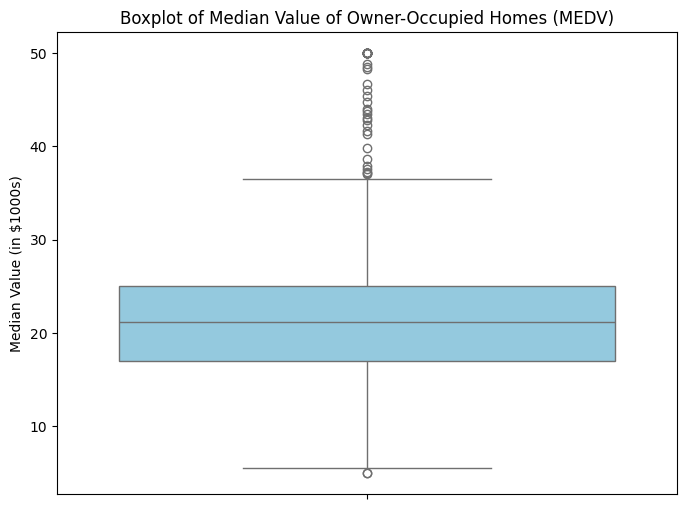

In [19]:
# Boxplot for MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df, color='skyblue')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value (in $1000s)')
plt.show()


<ipython-input-20-f269e9d87695>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHAS', data=boston_df, palette='pastel')


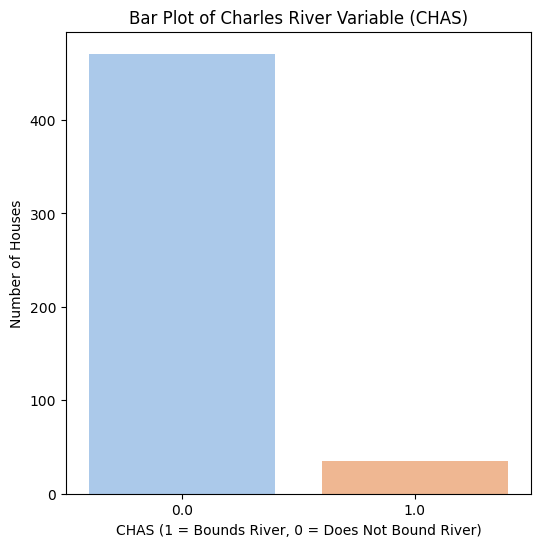

In [20]:
# Bar plot for CHAS
plt.figure(figsize=(6, 6))
sns.countplot(x='CHAS', data=boston_df, palette='pastel')
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 = Bounds River, 0 = Does Not Bound River)')
plt.ylabel('Number of Houses')
plt.show()


<ipython-input-21-4330e679f135>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_cat', y='MEDV', data=boston_df, palette='Set2')


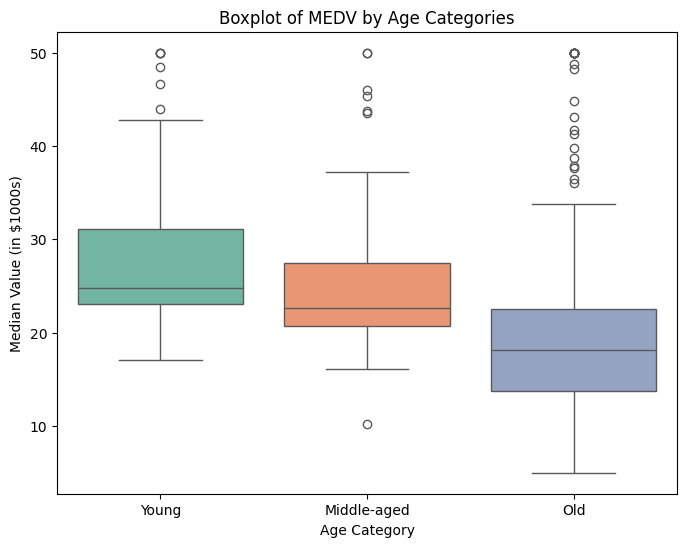

In [21]:
# Boxplot for MEDV vs AGE categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_cat', y='MEDV', data=boston_df, palette='Set2')
plt.title('Boxplot of MEDV by Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Median Value (in $1000s)')
plt.show()


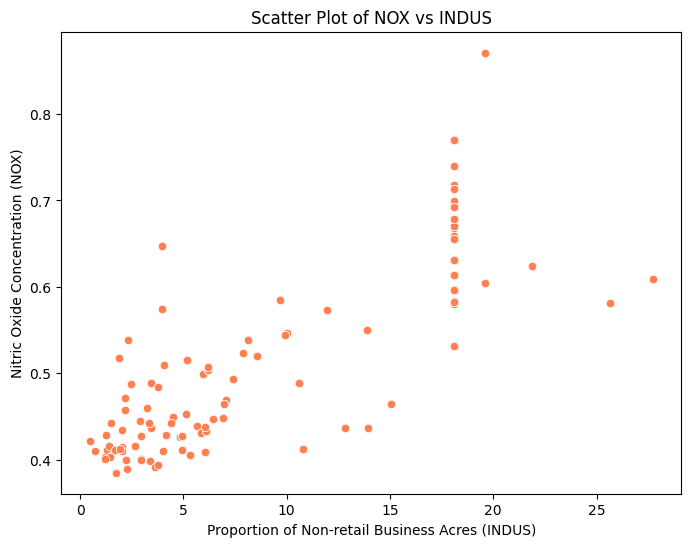

In [22]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='coral')
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()


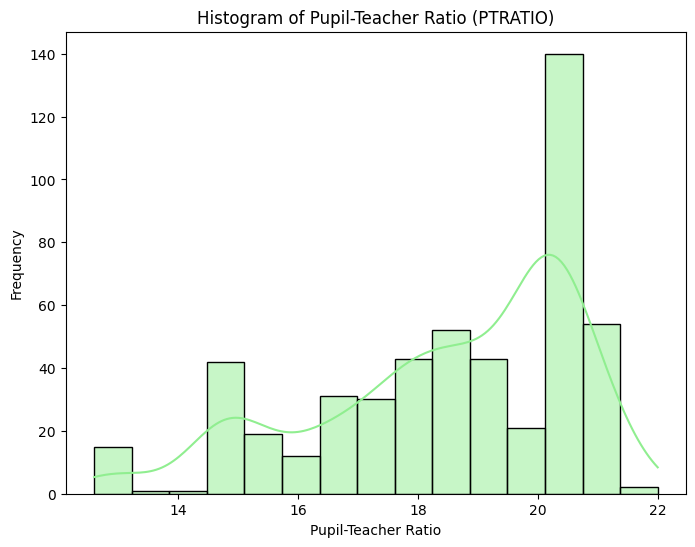

In [23]:
# Histogram for PTRATIO
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True, color='lightgreen')
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()
